In [ ]:
# This program attempts to optimize a users portfolio using the Efficient Frontier

In [13]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install pandas_datareader 

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yfin
yfin.pdr_override()

In [15]:
# Get the stock tickers for FAANG

assets = ['AAPL','AMZN','NFLX','GOOG','META']

In [16]:
# Assign weights to the stocks

weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [17]:
# Get the portfolio start date

stockStartDate = '2013-01-01'

In [18]:
# Get the portfolio end date

today = datetime.today().strftime('%Y-%m-%d')
today

'2023-01-05'

In [19]:
# Create a dataframe to store the adjusted close price of the stocks

# Store the adjusted close price into the df


df = pdr.get_data_yahoo(assets, start=stockStartDate, end=today)['Adj Close']

df

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2013-01-02,16.862822,12.865500,18.013729,28.000000,13.144286
2013-01-03,16.649975,12.924000,18.024191,27.770000,13.798571
2013-01-04,16.186199,12.957500,18.380356,28.760000,13.711429
2013-01-07,16.090982,13.423000,18.300158,29.420000,14.171429
2013-01-08,16.134291,13.319000,18.264042,29.059999,13.880000
...,...,...,...,...,...
2022-12-28,126.040001,81.820000,86.459999,115.620003,276.880005
2022-12-29,129.610001,84.180000,88.949997,120.260002,291.119995
2022-12-30,129.929993,84.000000,88.730003,120.339996,294.880005


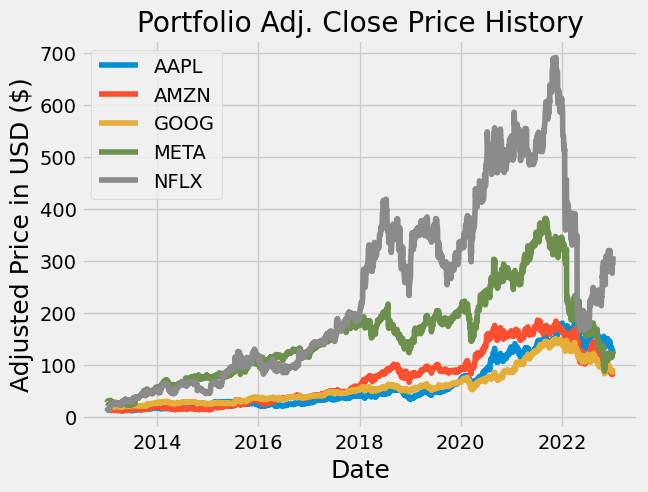

In [20]:
# Visually show the portfolio

title = 'Portfolio Adj. Close Price History'

#Get Stocks 
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)
    
plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adjusted Price in USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()



In [21]:
#Show the daily returns

returns = df.pct_change()
returns

,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012622,0.004547,0.000581,-0.008214,0.049777
2013-01-04,-0.027854,0.002592,0.019760,0.035650,-0.006315
2013-01-07,-0.005883,0.035925,-0.004363,0.022949,0.033549
2013-01-08,0.002691,-0.007748,-0.001974,-0.012237,-0.020565
...,...,...,...,...,...
2022-12-28,-0.030685,-0.014692,-0.016718,-0.010780,-0.025654
2022-12-29,0.028324,0.028844,0.028799,0.040131,0.051430
2022-12-30,0.002469,-0.002138,-0.002473,0.000665,0.012916


In [22]:
# Create and show the annualized covariance matrix

cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,AAPL,AMZN,GOOG,META,NFLX
AAPL,0.084553,0.047880,0.045000,0.053126,0.043841
AMZN,0.047880,0.106313,0.055697,0.067483,0.074626
GOOG,0.045000,0.055697,0.073476,0.061439,0.056211
META,0.053126,0.067483,0.061439,0.145285,0.075091
NFLX,0.043841,0.074626,0.056211,0.075091,0.228130


In [23]:
# Calculate the portfolio variance

port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.07194179270605766

In [24]:
# Calculate the portfolio volatility

port_volatility = np.sqrt(port_variance)
port_volatility

0.2682196724814525

In [25]:
# Annual portfolio return

portfolioSimpleAnnualReturn = (np.sum(returns.mean() * weights) * 252)
portfolioSimpleAnnualReturn

0.2672813486058287

In [26]:
# Show the expected annual return, volatility(risk) and variance

percent_var = str(round(port_variance,2) * 100) + '%'
percent_vol = str(round(port_volatility,2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn,2) * 100) + '%'

print('Expected Annual Return: ' + percent_ret)
print('Expected Risk: ' + percent_vol)
print('Expected Portfolio Variance: ' + percent_var)

Expected Annual Return: 27.0%
Expected Risk: 27.0%
Expected Portfolio Variance: 7.000000000000001%


In [4]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [7]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import objective_functions



In [78]:
pip install numpy==1.22.4

     ---------------------------------------- 14.7/14.7 MB 5.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.1
    Uninstalling numpy-1.22.1:
      Successfully uninstalled numpy-1.22.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.


In [27]:
# Portfolio Optimization

#Calculate the expected returns and the annualised sample covariance matrix of asset returns

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for max Sharpe Ratio
ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('AAPL', 0.5529), ('AMZN', 0.06233), ('GOOG', 0.00821), ('META', 0.0), ('NFLX', 0.37656)])
Expected annual return: 27.8%
Annual volatility: 29.1%
Sharpe Ratio: 0.89


(0.27774382525006003, 0.29066445801885304, 0.8867400816970277)